# Representation of signals & inverse problems - G1-G2
---
## Lab session 4: Gradient descent

---
## Guidelines (read carefully before starting)

**Objective**: this lab is divided into two part. The first part summarizes the theoretical notions used throughout this lab, and does not contain any question. The second part contains 3 exercises, which will guide you through the following
1. introduction to gradient descent on a toy example;
2. image denoising with the gradient descent;
3. image inpainting with the projected gradient descent.


**Guidelines**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab4_Name1_Name2
- duplicate the notebook file and rename it lab4_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `rsp` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=rsp --file=requirement.txt
    conda activate rsp
    conda deactivate rsp # to deactivate the conda environment
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=rsp
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `rsp`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).
- if needed, an excellent tutorial on the use of Python for scientific computing can be found in the [Scipy lecture notes](https://scipy-lectures.org/).
- Execute the code cell below to load all the libraries used in this lab

**Assessment** &#8594; global grade from F to A (A+)

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. Any code produced should be commented whenever appropriate, custom functions and objects documented . Figure produced should be clearly annotated (axis, title, legend whenever appropriate).

1. Numerical correctness
2. Implementation clarity (documentation, relevance of the comments)
3. Answers to the questions and overall presentation of the Jupyter notebook.

In [155]:
# make sure the notebook reloads the module each time we modify it
%load_ext autoreload
%autoreload 2

# Uncomment the next line if you want to be able to zoom on plots (one of the options below)
#matplotlib widget
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # to be used later on for plotting
from PIL import Image # library to load images

## Contents <a name="content"></a>
1. [Theory](#theory)
    1. [Gradient descent](#gradient_descent)
    2. [Projected gradient descent](#proj_gradient_descent)
    3. [Inverse problems and discrete gradient operator](#inv_pb)
2. [Exercises](#questions)
    1. [A gentle introduction to gradient descent](#ex_1)
    2. [Image denoising with the gradient descent](#ex_2)
    3. [Image inpainting with the projected gradient descent](#ex_3)

---
## Theory <a name="theory"></a> [(&#8593;)](#content)

### Gradient descent <a name="gradient_descent"></a> (for [Exercise I](#ex_1) and [Exercise II](#ex_2))

Consider the minimization of a convex smooth function $f : \mathbb{R}^N \rightarrow \mathbb{R}$, expressed as
$$\underset{x \in \mathbb{R}^N}{\min} f(x).$$

In this setting, a solution to the above problem can be estimated with the *gradient method*, which  iteratively computes

$$ x^{(k+1)} = x^{(k)} - \tau \nabla f(x^{(k)}), $$

starting from an arbitrary initial point $x^{(0)} \in \mathbb{R}^N$, where $\nabla f(x) \in \mathbb{R}^N$ is the gradient of $f$ at $x$. 

The sequence $(x^{(k)})_{k\in\mathbb{N}}$ is guaranteed to converge to a minimizer $x^\star$ of $f$ whenever the stepsize verifies 
$$0 < \tau < 2/\beta$$
where $\beta$ is a Lipschitz constant of $\nabla f$, that is, 
$$ \forall (x,x') \in \mathbb{R}^N \times \mathbb{R}^N, \quad
      \Vert \nabla f(x) - \nabla f(x') \Vert_2 \leq \beta \Vert x-x' \Vert_2. $$

> **Remark**: For instance, if $f$ is of class $\mathscr{C}^2$, $$\beta= \sup_{x} \Vert Hf(x) \Vert$$
where $Hf(x) \in \mathbb{R}^{N \times N}$ is the Hessian of $f$ at $x$ and $\Vert \cdot \Vert$ is the spectral operator norm (largest eigenvalue). 

### Projected gradient descent <a name="proj_gradient_descent"></a> (for [Exercise III](#ex_3))

For some applications, the problem consists in minimizing a smooth convex cost function $f$, subject to the constraint that the solution belongs to a closed convex set $\Omega \subset \mathbb{R}^N$. The optimization problem can be formulated as
$$\underset{x \in \Omega}{\min} f(x)\quad\equiv\quad\underset{x \in \mathbb{R}^N}{\min} f(x)\quad\mbox{s.t.}\quad x\in\Omega \equiv\quad\underset{x \in \mathbb{R}^N}{\min} f(x) + \iota_{\Omega}(x)$$
where $\iota_{\Omega}$ is the indicator function of the set $\Omega$ ($\iota_{\Omega}(x) = 0$ if $x \in \Omega$, $+\infty$ otherwise).

Starting from an arbitrary initial point $x^{(0)} \in \mathbb{R}^N$, a natural extension of the gradient descent, the *projected gradient descent*, iteratively computes
$$ x^{(k+1)} = P_\Omega\big(x^{(k)} - \tau \nabla f(x^{(k)})\big), $$

where $k \in \mathbb{N}$, and $P_\Omega$ is the orthogonal projector onto $\Omega$ (since $\Omega$ is a closed convex set, the projection exists and is unique). Note that $P_\Omega$ is the proximal operator of the indicator function: the projected gradient descent is thus a special case of the proximal gradient descent introduced in the lecture. Convergence of the iterates $x^{(k)}$ to a solution $x^\star$ of the problem is guaranteed, provided that $0<\tau<2/\beta$ (with $\beta$ the Lipschitz contant of $\nabla f$).

### Inverse problems and discrete gradient operator <a name="inv_pb"></a> (for [Exercise II](#ex_2) and [Exercise III](#ex_3))

#### Generalities
An imaging inverse problem consists in estimating an unknown image $\bar{x}$ from data $y$ containing partial, degraded information about $\bar{x}$. We consider a forward model of the form

$$y=A\bar{x} + n$$

where $A$ is a known linear observation/degradation operator, and $n$ a realization of a random vector. We further assume that the noise is white and Gaussian. 

In general, the operator $A$ is not invertible, which makes the problem ill-posed. Prior information about the is thus needed to regularize the problem and make it well-posed. 

#### Imaging inverse problems <a name="imaging_inverse_problem"></a>

- For imaging applications, $x \in \mathbb{R}^{N_1 \times N_2}$. In practice, the image $x$ can be stored either as a matrix, or as a vector in $\mathbb{R}^{N}$, with $N = N_1 N_2$ (*e.g.*, by stacking the columns or the rows of $x$). In the rest of this lab, we will slightly abuse notations by using the same notation $x$, whether the image is considered in matrix or vector form.

- **Tikhonov regularization**: $\bar{x}$ can be estimated as a solution to 
$$\underset{x \in \mathbb{R}^N}{\min} \frac{1}{2}\|Ax-y\|^2_{\text{F}} + \frac{\lambda}{2}\|Dx\|^2_{\text{F}}$$
where $D$ a linear operator to be specified, $\lambda > 0$ is a regularization parameter whose value depends on the noise level, and $\|\cdot\|_F$ is the Frobenius norm

\begin{equation}
    (\forall x \in \mathbb{R}^{N_1 \times N_2}) \quad \|x\|_F^2 = \sum_{n_1, n_2} x_{n_1, n_2}^2.
\end{equation}

Gradient descent can be used to solve the above problem, since the objective function to be minimized is smooth (quadratic). In addition
$$(\forall x \in \mathbb{R}^{N_1 \times N_2}) \quad \nabla f(x) = A^*(Ax-y) + \lambda D^*Dx = (A^*A + \lambda D^*D)x - A^*y.$$

Note that the expression of the operators $A^*A$ (where $A^*$ is the adjoint of $A$) and $D^*D$ are needed to compute $\nabla f(x)$.

- **Regularization of natural images**: Natural images exhibit smooth spatial variations of the pixels values, implying that their discrete gradient has a low energy. This motivates the use of Tikhonov regularization based on the discrete gradient, as illustrated in the next paragraph.

#### Discrete gradient: definition and illustration (useful for [exercise III](#ex_3))

- **Definition**: The discrete gradient is fundamental in image processing to encode prior knowledge about the spatial content of the image. It is defined as a linear operator $D : \mathbb{R}^{N_1 \times N_2} \rightarrow \mathbb{R}^{N_1 \times N_2} \times \mathbb{R}^{N_1 \times N_2}$ mapping an image to a pair of images, obtained by computing vertical and horizontal differences between the pixel values, respectively. Assuming von Neumann boundary conditions (*i.e.*, a difference accross a boundary is set to 0), the operator can be defined as

\begin{equation}
    Dx = (D_V x, D_H x)
\end{equation}
with

\begin{align}
    D_V x \in \mathbb{R}^{N_1 \times N_2}, \quad (\forall n_2 \in \{0, \dotsc, N_2-1\}) \; (D_V x)_ {n_1, n_2} = \begin{cases}
     x_{n_1+1,n_2}-x_{n_1,n_2} \mbox{ if } n_1 \in \{0, \dotsc, N_1-2\} \\
     0 \mbox{ otherwise.}
    \end{cases} \\
    %
    D_H x \in \mathbb{R}^{N_1 \times N_2}, \quad (\forall n_1 \in \{0, \dotsc, N_1-1\}) \; (D_H x)_ {n_1, n_2} = \begin{cases}
     x_{n_1,n_2+1}-x_{n_1,n_2} \mbox{ if } n_2 \in \{0, \dotsc, N_2-2\} \\
     0 \mbox{ otherwise.}
    \end{cases}
\end{align}


In the rest of this lab, we will consider the quantity $\|Dx\|_F^2$, defined as 

\begin{equation}
    \|Dx\|_F^2 = \|D_V x\|_F^2 + \|D_H x\|_F^2 = \sum_{n_1, n_2} (D_V x)^2_{n_1,n_2} + (D_H x)^2_{n_1,n_2}.
\end{equation}

- **Illustration and example codes**: 

a) We first load a ground truth image $\bar{x}$ and display it.

In [157]:
# Load the image

imgpil = Image.open("img/boat.png")  
x_bar = np.array(imgpil)
imgpil.close()

print(x_bar.shape)
print("Image size: %s x %s." % (x_bar.shape[0],x_bar.shape[1]))
print("Pixel values are in the interval [%s,%s]." % (x_bar.min(), x_bar.max()))

x_bar = x_bar.astype(np.float) # ensure pixel values are floating point numbers

(512, 512)
Image size: 512 x 512.
Pixel values are in the interval [0,239].


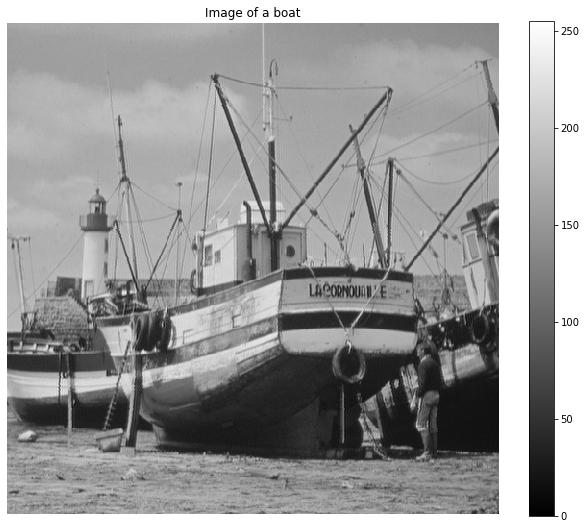

In [158]:
# Display the image

plt.figure(figsize=(11,11))
plt.imshow(x_bar, interpolation='None', cmap=plt.cm.gray, vmin=0, vmax=255)
# Without specifying vmin and vmax, imshow auto-adjusts its range so that black and white are
# the min and max of the data, respectively.
plt.colorbar()       # displays the color bar close to the image
plt.axis('off')      # remove the axes (comment to restore axes)
plt.subplots_adjust(top=0.75)
plt.title('Image of a boat')
plt.show()

b) We implement the discrete gradient operator $D$ in a Python function

In [159]:
def D(x):
    vdiff = np.r_[np.diff(x,1,0), np.zeros([1,x.shape[1]])] # the r_ command concatenates along the rows
    hdiff = np.c_[np.diff(x,1,1), np.zeros([x.shape[0],1])] # the c_ command concatenates along the columns
    return np.concatenate((vdiff[...,np.newaxis], hdiff[...,np.newaxis]), axis=2) # combination along a third dimension
# An alternative, more compact, definition:
#D = lambda x : c_['2,3',r_[np.diff(x,1,0), np.zeros([1,x.shape[1]])],c_[np.diff(x,1,1), np.zeros([x.shape[0],1])]]

## Apply the function to the reference image
v = D(x_bar)

and display the two components of $D\bar{x}$ as two grayscale images.

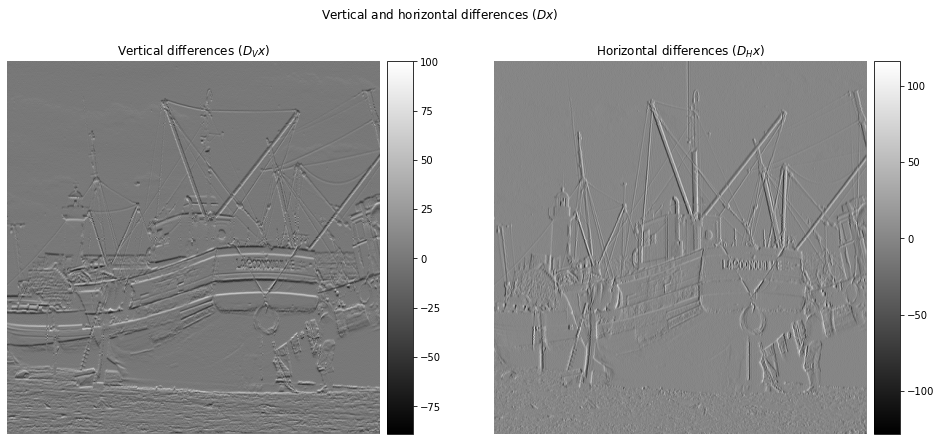

In [160]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, (axv,axh) = plt.subplots(1,2,figsize=(16,7)) # one figure with two horizontal subfigures
plt.suptitle(r"Vertical and horizontal differences ($Dx$)")
imv=axv.imshow(v[:,:,0], cmap=plt.cm.gray)
imh=axh.imshow(v[:,:,1], cmap=plt.cm.gray)
axv.axis('off')
axh.axis('off')
axv.set_title('Vertical differences ($D_V x$)')
axh.set_title('Horizontal differences ($D_H x$)')
dividerv = make_axes_locatable(axv)
caxv = dividerv.append_axes("right", size="7%", pad=0.1)
plt.colorbar(imv, cax=caxv)
dividerh = make_axes_locatable(axh)
caxh = dividerh.append_axes("right", size="7%", pad=0.1)
plt.colorbar(imh, cax=caxh)
plt.show()

c) Displaying the quantity $\|D\bar{x}\|_F = \sqrt{\|D_V \bar{x}\|^2_F + \|D_H \bar{x}\|^2_F}$,

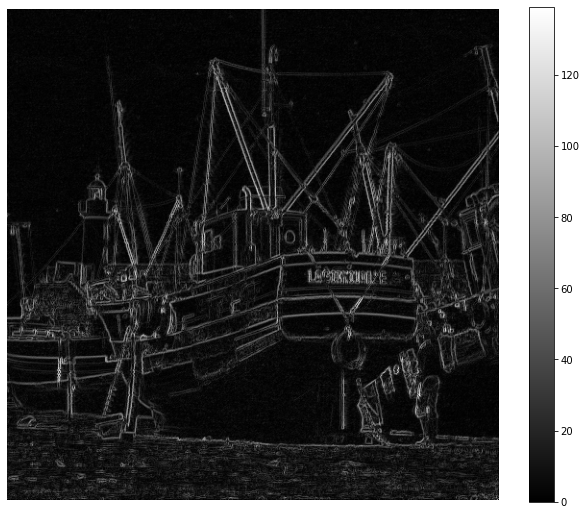

In [161]:
plt.figure(figsize=(11,11))
plt.imshow(np.sqrt(np.sum(v**2,2)), cmap=plt.cm.gray, vmin=0)
plt.colorbar()  
plt.axis('off')
plt.subplots_adjust(top=0.75)

we observe that the energy is concentrated around edges, and relatively low in other pixels. This indicates that the magnitude of the pixels in the discrete gradient appears to be relatively low, except on the edges.

d) Finally, we implement the adjoint of the discrete gradient operator

In [162]:
def D_adj(v): 
    return np.r_['0,2',-v[0,:,0],-np.diff(v[:-1,:,0],1,0),v[-2,:,0]] + np.c_['1,2',-v[:,0,1],-np.diff(v[:,:-1,1],1,1),v[:,-2,1]]

$D^*$ can be viewed as the opposite of a discrete divergence operator. One can check that $\|D x\|^2 - \langle D^*Dx, x \rangle=0$ to verify that the two operators are adjoint.

In [163]:
(D(x_bar)**2).sum() - (D_adj(D(x_bar))*x_bar).sum()

0.0

---
## Exercises 

### I. A gentle introduction to gradient descent <a name="ex_1"></a> [(&#8593;)](#content)

Consider the minimization of a quadratic form in $\mathbb{R}^2$ ($N=2$)
$$ f(x) = \frac{1}{2} \bigl( x_1^2 + \eta x_2^2 \bigr)$$
where $\eta>0$ controls the anisotropy, and hence the difficulty, of the problem.

We first define the anisotropy parameter $\eta$ and the function $f$

In [164]:
eta = 8
f = lambda x : (x[:, 0]**2 + eta*x[:, 1]**2) / 2

>**Note**: a **lambda function** is a one-line function definition, which captures the value of other variables (in the example above, `eta`).
>
> A simple example:
> ```python
>>> a = 1
>>> test_lambda_function = lambda x : x + a
>>> #apply the function to the input value 2
>>> print(test_lambda_function(2))
3
>>> #modify the value of a
>>> a = 2
>>> #same result as before: a was equal to 1 when the function 
>>> #was defined
>>> print(test_lambda_function(2)) 
4
```

We display the values taken by the function using a contourplot.

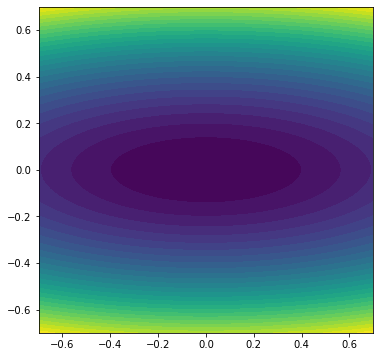

In [165]:
plt.figure(figsize=(6,6))
t = np.linspace(-.7,.7,101)
[u,v] = np.meshgrid(t,t)
F = (u**2 + eta*v**2) / 2
plt.contourf(t,t,F,35)
plt.show()

We define the gradient of $f$:

In [166]:
grad_f = lambda x : np.array([x[0], eta*x[1]])

Since $f$ is quadratic, its Hessian is the constant matrix $\left(\begin{array}{cc}1&0\\0&\eta\end{array}\right)$. Its spectral norm, which is the Lipschitz constant of `grad_f`, is $\beta=\max(1,\eta)$. Since the stepsize $\tau$ must satisfy $0< \tau < 2/\beta$, we take

In [167]:
tau = 1.8/max(eta,1); tau

0.225

Now we implement the gradient descent method: given the initial estimate $x^{(0)}$ of the solution, the stepsize $\tau$ and the number $k$ of iterations, we compute $x^{(k)}$:

In [168]:
nbiter = 10
x = np.array([1,1])         # initial estimate of the solution
for iter in range(nbiter):  # iterations from 0 to nbiter-1
    x = x - tau*grad_f(x)
print(x)                    # display the value of the solution

[0.07816584 0.10737418]


We encapsulate the above code in a function `gradient_descent`.

In [169]:
def gradient_descent(x0, grad_f, tau, nbiter):
    x = x0;
    for iter in range(nbiter):  # iterations from 0 to nbiter-1
        x = x - tau*grad_f(x)
    return x

In [170]:
gradient_descent([1,1], grad_f, tau, 10)

array([0.07816584, 0.10737418])

We modify the previous `gradient_descent` function to store the iterates in a matrix (2-D array).

In [171]:
def gradient_descent(x0, grad_f, tau, nbiter):
    
    X = np.zeros((nbiter+1, x0.size))
    X[0, :] = x0;
    for iter in range(nbiter):  
        X[iter+1, :] = X[iter, :] - tau*grad_f(X[iter, :])     
    return X

In [172]:
X = gradient_descent(np.array([0.6,0.6]), grad_f, 0.225, 30)

We plot the cost function $f(x^{(k)})$ as a function of $k$, in log-scale:

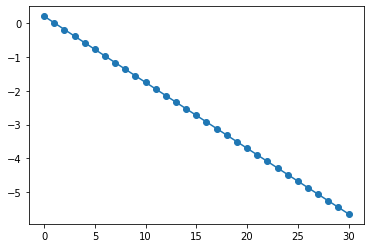

In [173]:
plt.figure()
plt.plot(range(X.shape[0]),np.log10(f(X)),'o-')
plt.show()

Observe that the gradient descent algorithm is monotonic, in that $f(x^{(k)})$ decreases from one iteration to another.

We plot the iterates above the contourplot of $f$:

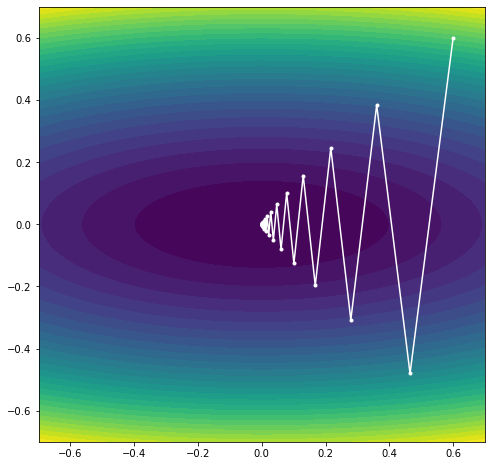

In [174]:
plt.figure(figsize=(8,8))
plt.contourf(t,t,F,35)
plt.plot(X[:,0], X[:,1], 'w.-')
plt.show()

### Questions:

1. Adapt the previous cells to run the algorithm with different values of tau (try 0.25,0.225,0.2,0.05). Qualitatively, is the algorithm converging for each of these values? For which value does it converge the fastest to the solution?
2. Try a different initial estimate (e.g., a randomly generated one). Does the algorithm still converge to the solution of the problem? Justify your statement with a theoretical argument from the lectures.

1. Your answers for 1. (complete this cell with your observations)

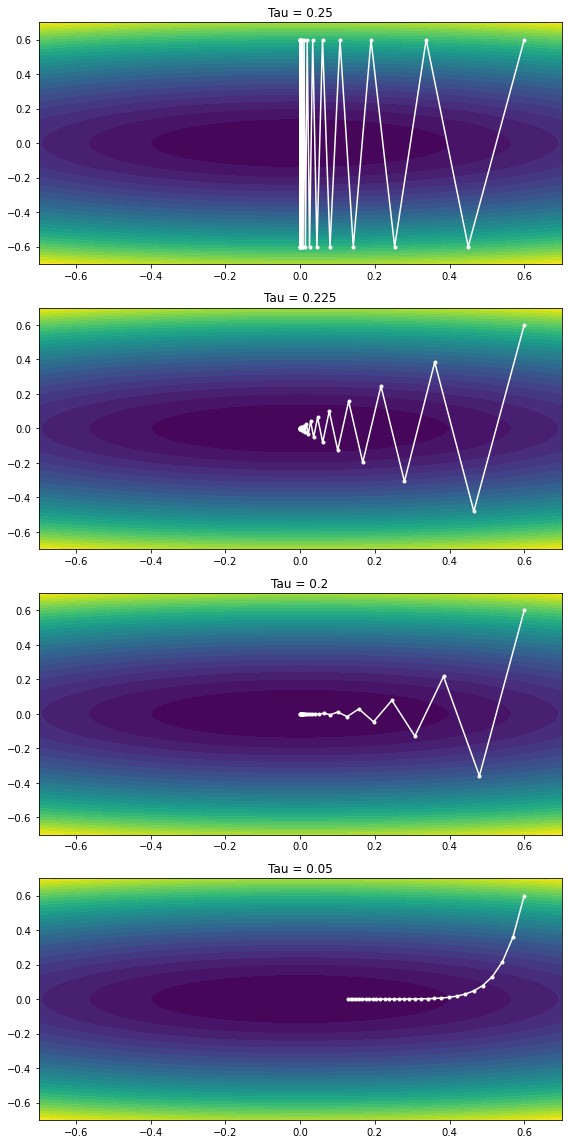

In [175]:
plt.figure(figsize=(8,16))

taus = [0.25,0.225,0.2,0.05]
i = 1
for tau in taus:

    X = gradient_descent(np.array([0.6,0.6]), grad_f, tau, 30)
   
    plt.subplot(len(taus), 1, i)
    plt.contourf(t,t,F,35)
    plt.plot(X[:,0], X[:,1], 'w.-')
    plt.title('Tau = ' + str(tau))
    i+=1
    
plt.tight_layout()    

We see a convergence for $\tau = 0.225$, $\tau = 0.2$ and $\tau = 0.05$.

For $\tau = 0.25$, which is the limit for $0< \tau < 2/\beta$, the descent does not cenverge.

The fastest convergence seems to be around $\tau = 0.225$.

2. Your answers for 2. (complete this cell with your observations)

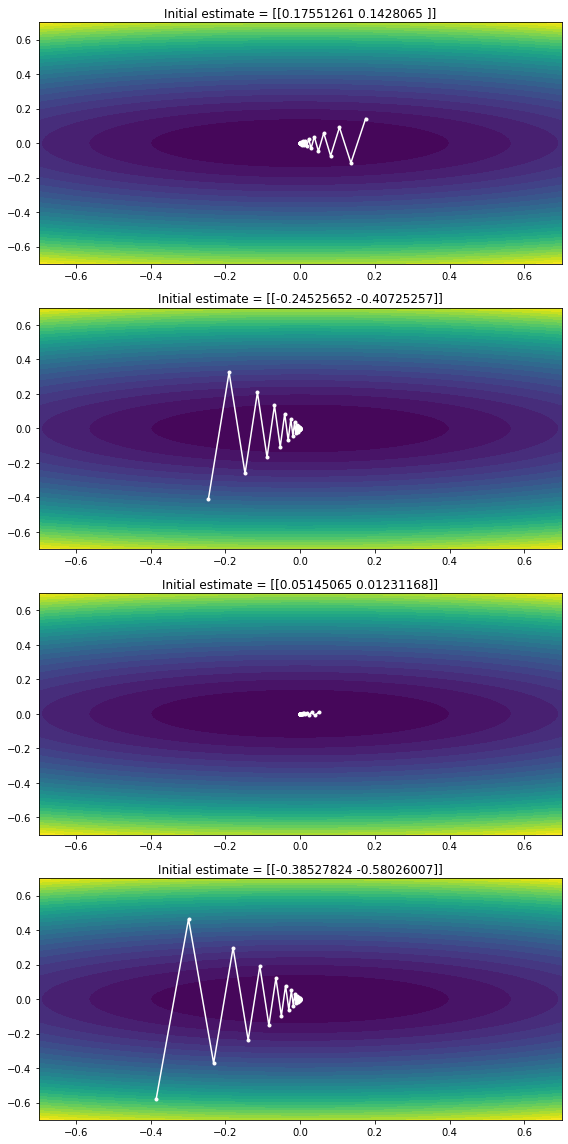

In [176]:
plt.figure(figsize=(8,16))

tau = 0.225
i = 1
while i <5:

    x0 = np.random.rand(1,2)*0.7*np.random.choice([1,-1])
    X = gradient_descent(x0, grad_f, tau, 30)
   
    plt.subplot(4, 1, i)
    plt.contourf(t,t,F,35)
    plt.plot(X[:,0], X[:,1], 'w.-')
    plt.title('Initial estimate = ' + str(x0))
    i+=1
    
plt.tight_layout()

The gradient descent still converges as we change the initial estimate.

The function we try to minimize is strictly convex, so there is only one global minimum (0,0).

Because there is only one solution and because f is differentiable, the gradient descent will always converge towards it (with an appropriate $\tau$)

---
### II. Image denoising with the gradient descent <a name="ex_2"></a> [(&#8593;)](#content)

Denoising an image $y \in \mathbb{R}^{N_1\times N_2}$ can be seen as a special instance of the problem described in the [theory paragraph above](#imaging_inverse_problem) with $A = I$, the identity operator. Assuming the noise corrupting the data is white and Gaussian, of variance $\sigma^2$, denoising can be formulated as 
$$\underset{x \in \mathbb{R}^N}{\min} \frac{1}{2}\|x-y\|_F^2+\frac{\lambda}{2}\|Dx\|^2_F.$$

> Note that $x$ belongs to a Euclidean space of dimension $N=N_1 N_2$, which is the number of pixels composing the image.

> For numerical applications, we will consider $\lambda = 8$.

#### Generating synthetic data

1\. **[Python]** Load a ground truth image with Python, stored in a variable `x_bar` (you can use the sample code given in the [Theory](#theory) section).

In [177]:
# Load the image

imgpil = Image.open("img/boat.png")  
x_bar = np.array(imgpil)
imgpil.close()

print(x_bar.shape)
print("Image size: %s x %s." % (x_bar.shape[0],x_bar.shape[1]))
print("Pixel values are in the interval [%s,%s]." % (x_bar.min(), x_bar.max()))

x_bar = x_bar.astype(np.float) # ensure pixel values are floating point numbers

(512, 512)
Image size: 512 x 512.
Pixel values are in the interval [0,239].


In [178]:
# Load the image (use example code from the theory section)
# Complete the code below

# x_bar = ...

# print(x_bar.shape)
# print("The size of the image is %s x %s." % (x_bar.shape[0],x_bar.shape[1]))
# print("The range of the pixel values is [%s,%s]." % (x_bar.min(), x_bar.max()))

# x_bar = x_bar.astype(np.float) # ensure pixel values are floating point numbers

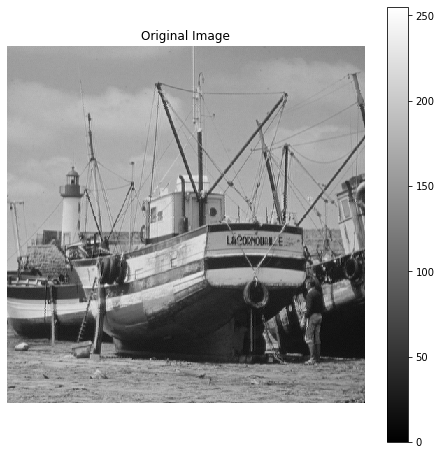

In [179]:
# Display the image

plt.figure(figsize=(8,8))
plt.imshow(x_bar, interpolation='None', cmap=plt.cm.gray, vmin=0, vmax=255)
# Without specifying vmin and vmax, imshow auto-adjusts its range so that black and white are
# the min and max of the data, respectively.
plt.colorbar()       # displays the color bar close to the image
plt.axis('off')      # remove the axes (comment to restore axes)
#plt.subplots_adjust(top=0.75)
plt.title('Original Image')
plt.show()

2\. **[Theory/Python]** The input signal-to-noise ratio (iSNR) is defined as

\begin{equation}
    \text{iSNR} = 10\log_{10} \biggl( \frac{\|y_0\|_{\text{F}}^2}{N\sigma^2} \biggr)
\end{equation}

where $y_0 \in \mathbb{R}^{N_1\times N_2}$ denotes the noiseless data (i.e., $y_0 = \bar{x}$ for the denoising problem), and $\sigma^2$ is the variance of the white Gaussian noise.

a) Give the expression of $\sigma^2$ in function of the $\text{iSNR}$. Complete the code cell below to compute its value for $\text{iSNR} = 20$ dB, and generate the noisy data using the measurement model

\begin{equation}
    y = \bar{x} + n = y_0 + n
\end{equation}

with $n$ a realization of the random vector $\underline{n} \sim \mathcal{N}(0, \sigma^2 I)$.

> Hint: 
> - generating random variables: as an example, independent, identically distributed uniform random variables can be generated with the following piece of code
> ```python
> rng = np.random.default_rng(0) # set random seed
> rv = rng.uniform(2,2)          # generate i.i.d uniform random variables
> ```
> - to generate a Gaussian random variable, take a look at the documentation of the numpy function `numpy.random.normal` [(doc. here)](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html)
> - to compute the norm of a vector, take a look at the documentation of the numpy function `numpy.linalg.norm` [(doc. here)](https://numpy.org/doc/1.18/reference/generated/numpy.linalg.norm.html)

Your answers (complete this cell with your observations)

We have 
\begin{equation}
    \sigma^2 = \biggl( \frac{\|y_0\|_{\text{F}}^2}{N.10^{\frac{\text{iSNR}}{10}}} \biggr)
\end{equation}

In [216]:
# complete instructions below

(N1,N2) = x_bar.shape

# set the random seed (ensures reproducible results when generating random variables)
rng = np.random.default_rng(0)

isnr = 20    # input SNR (in dB)
sigma2 = (np.linalg.norm(x_bar)**2)/(N1*N2 * (10**(isnr/10))) # noise variance

y = x_bar + np.random.normal(0,np.sqrt(sigma2), size = x_bar.shape)   # noisy data

b) Display the noisy image and the ground truth (with a gray colorbar).

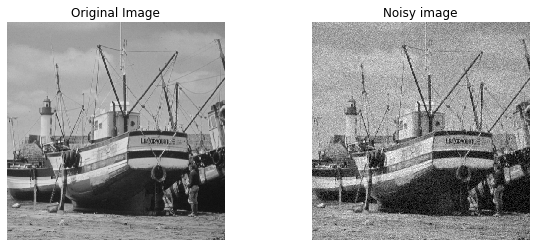

In [217]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(x_bar, interpolation='None', cmap=plt.cm.gray, vmin=0, vmax=255)
# Without specifying vmin and vmax, imshow auto-adjusts its range so that black and white are
# the min and max of the data, respectively.
plt.axis('off')      # remove the axes (comment to restore axes)
#plt.subplots_adjust(top=0.75)
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(y, interpolation='None', cmap=plt.cm.gray, vmin=0, vmax=255)
plt.axis('off')
plt.title('Noisy image')

plt.show()

#### Gradient descent algorithm

3\. **[Theory/Python]**: Give the expression of $\nabla f$ for this denoising problem. Implement a Python function `grad_f` to compute its value, using the discrete gradient `D` and its adjoint `D_adj`.

```python
def grad_f(x, y, Lambda):
    # return ?
```

Your answers (complete this cell with your observations)

According to the expression given by the theory : 

$$(\forall x \in \mathbb{R}^{N_1 \times N_2}) \quad \nabla f(x) = A^*(Ax-y) + \lambda D^*Dx = (A^*A + \lambda D^*D)x - A^*y.$$

In the context of our denoising problem, we have $A$ equals the identity matrix and then :

$$(\forall x \in \mathbb{R}^{N_1 \times N_2}) \quad \nabla f(x) = x + \lambda D^*Dx - y.$$

In [218]:
def grad_f(x,y,Lambda):
    
    I = np.eye(x.shape[0])
    
    return(x+Lambda*D_adj(D(x)) - y)

4\. **[Python]**: The expression of the Lipschitz constant $\beta$ can be taken as $\|I+\lambda D^*D\|=1+8\lambda$. Using this information and the function `grad_f` implemented in 3., apply the gradient descent algorithm ($\approx$ 100 iterations) to estimate a solution to the denoising problem. Make sure the function returns both the final estimate and the values $(f(x^{(k)}))_k$.

> Hint: use the example gradient descent introduced in the first [exercise](#ex_1).

In [219]:
# your code: complete the elements given below

def gradient_descent(grad_f, y, Lambda, x0, nbiter, tau):
     
    x = x0;
    X = np.zeros((nbiter+1, x0.shape[0],x0.shape[1]))
    X[0,:] = x0
    for iter in range(nbiter):  # iterations from 0 to nbiter-1
        x = x - tau*grad_f(x,y,Lambda)
        X[iter+1, :] = X[iter, :] - tau*grad_f(X[iter, :],y,Lambda)
    return X

In [220]:
Lambda = 8
tau = 1.9/(1+8*Lambda)
nbiter = 100

#### Interpretation of the results

5\. **[Theory/Python]**: Display the denoised and the ground truth image. What do you observe? Are details well recovered? Conclude about the relevance of Tikhonov regularization for denoising natural images.

Your comments (complete this cell with your observations)

In [221]:
X = gradient_descent(grad_f, y , Lambda, y, nbiter,tau)[-1,:]

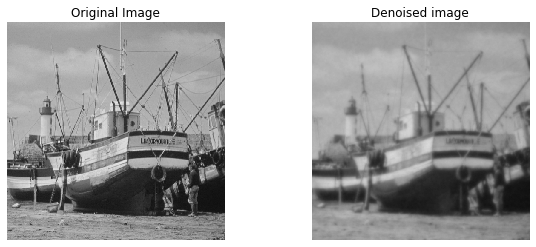

In [222]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(x_bar, interpolation='None', cmap=plt.cm.gray, vmin=0, vmax=255)
# Without specifying vmin and vmax, imshow auto-adjusts its range so that black and white are
# the min and max of the data, respectively.
plt.axis('off')      # remove the axes (comment to restore axes)
#plt.subplots_adjust(top=0.75)
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(X, interpolation='None', cmap=plt.cm.gray, vmin=0, vmax=255)
plt.axis('off')
plt.title('Denoised image')

plt.show()

In the end of the denoising process, we have reduced the noise in the image but, the result is blurred by the process. 

The critical points of the minimization problem of corresponds to $\nabla f(x) = 0$ which corresponds to $x + \lambda D^*Dx = y$. Then we have a linear relation between $x$ and $y$ so this might be the reason it is not adapted for a quadratic type of problem.

Then, Tikhonov regularization is not the best method to denoise a signal.

---
## III. Image inpainting with the projected gradient descent <a name="ex_3"></a> [(&#8593;)](#content)

Inpainting consists in inferring the value of missing pixels in an image from a set of available pixels. In this section, we will recover the content of an image knowing the value of only 10% of its pixels.

We first formulate inpainting as the following optimization problem

$$\underset{x \in \Omega}{\min} f(x)\quad\equiv\quad\underset{x \in \mathbb{R}^{N_1\times N_2}}{\min} \frac{1}{2}\|Dx\|_{\text{F}}^2\quad\mbox{s.t.}\quad Ax=y.$$

#### Synthetic data generation

In [188]:
# Load the image
imgpil = Image.open("img/boat.png")  
x_bar = np.array(imgpil)
imgpil.close()

print(x_bar.shape)
print("Image size: %s x %s." % (x_bar.shape[0],x_bar.shape[1]))
print("Pixel values are in the interval [%s,%s]." % (x_bar.min(), x_bar.max()))

x_bar = x_bar.astype(np.float) # ensure pixel values are floating point numbers

(512, 512)
Image size: 512 x 512.
Pixel values are in the interval [0,239].


6\. **[Python]**: The degradation operator $A$ is simply pixelwise multiplication by the binary mask, and we have $A^*=A$.

Generate a random mask to select 10% of the ground truth image $\bar{x}$ to simulate a partially observed image. Generate the image to be inpainted $y$. Display the mask and the data $y$.

> Hint: you can for instance use the `np.random.rand` function to generate the mask (of the same size as the image). Another option consists in using `np.random.choice` and `np.unravel_index`.

In [189]:
N1,N2 = x_bar.shape

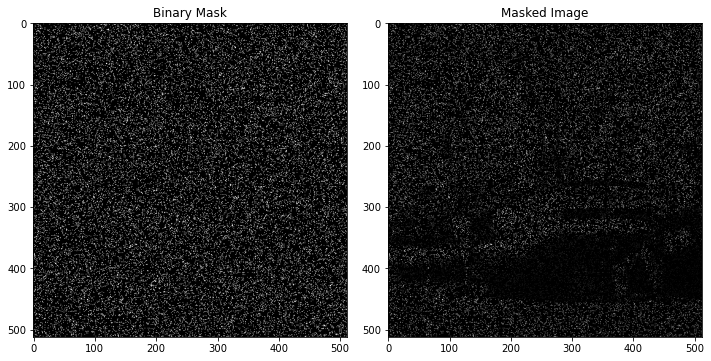

In [190]:
N1,N2 = x_bar.shape
sample = np.random.rand(N1,N2)
mask = np.where(sample<=0.1,1,0)

y = np.multiply(x_bar,mask)
# Display the binary mask and the masked image (with missing values)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(mask,cmap='gray')
plt.title('Binary Mask')

plt.subplot(1,2,2)
plt.imshow(y, cmap='gray')
plt.title("Masked Image")

plt.tight_layout()

#### Projected gradient descent

7\. **[Python]** Implement a function `grad_f` to compute $\nabla f$.

```python
def grad_f(x):
#     return ... ?
```

In [191]:
def grad_f(x):
    
    I = np.eye(x.shape[0])
    #np.multiply(mask,x)+Lambda*D_adj(D(x)) - np.multiply(mask,y)
    
    return(D_adj(D(x)))

8\. **[Python]** Implement a function `projection_inpainting` to compute the projection of a vector $u$ onto the closed convex set $\{x \mid Ax = y \}$.

> Hint: projecting onto this set reduces to setting $u_i = y_i$ for the indices $i$ which are not masked.

For every coefficient in $u$, the coefficient is either nulled by the mask or kept ($mask_{i,j}==1$). In the case of the coefficient being kept, to ensure the vector belongs to the convex set $\{x \mid Ax = y \}$, we have to set this coefficient equal to the one in $y$.

In [192]:
def projection_inpainting(u,y, mask):

    u[np.where(mask==1)[0],np.where(mask==1)[1]] = y[np.where(mask==1)[0],np.where(mask==1)[1]]  
    
    return(u)

In [193]:
def projected_gradient_descent(grad_f, projection_inpainting, y, mask, x0, nbiter, tau):
    x = x0

    for iter in range(nbiter):  # iterations from 0 to nbiter-1
        x = projection_inpainting(x - tau*grad_f(x),y,mask)
        
    return x

#### Interpretation of the results

10\. **[Theory/Python]** Apply the projected gradient algorithm starting from $x^{(0)} = y$, for 300 iterations. Display the estimated image, and conclude about the efficiency of this approach.

Your comments (complete this cell with your observations)

In [194]:
tau = 1.9 / 8
nbiter = 300

In [195]:
# your code...
xrestored = projected_gradient_descent(grad_f, projection_inpainting, y, mask, y, nbiter, tau)

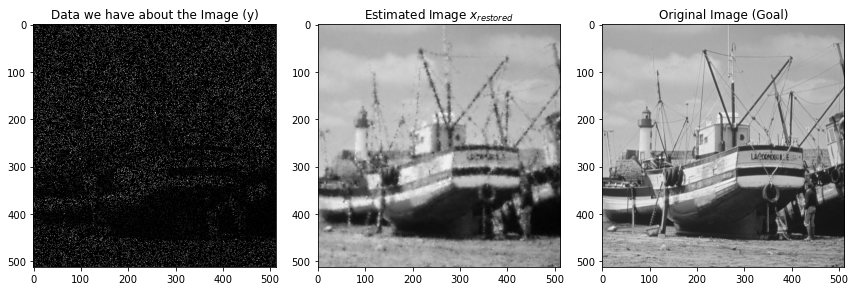

In [196]:
# display reconstructed (inpainted) image
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(y,cmap='gray')
plt.title('Data we have about the Image (y)')

plt.subplot(1,3,2)
plt.imshow(xrestored,cmap='gray')
plt.title('Estimated Image $x_{restored}$')

plt.subplot(1,3,3)
plt.imshow(x_bar,cmap='gray')
plt.title('Original Image (Goal)')

plt.tight_layout()

The estimated image is fair enough in comparaison to the amount of knowledge we had about the original signal (10%). 
We can check the error between our estimation and the true signal:

In [197]:
error = 100*np.linalg.norm(x_bar-xrestored)/np.linalg.norm(x_bar)
print('The relative difference between the goal and the estimation is around : ' + str(np.around(error,2)) + '%')

The relative difference between the goal and the estimation is around : 9.91%


### Bonus : What if we know even less ?

#### If we have around 5% of the original image :

(512, 512)
Image size: 512 x 512.
Pixel values are in the interval [0,239].


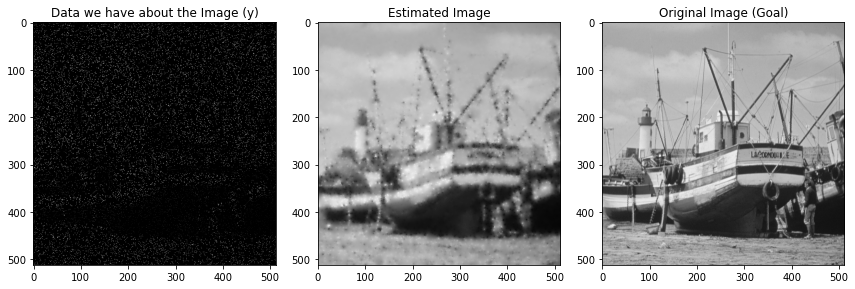

In [198]:
# Load the image
imgpil = Image.open("img/boat.png")  
x_bar = np.array(imgpil)
imgpil.close()

print(x_bar.shape)
print("Image size: %s x %s." % (x_bar.shape[0],x_bar.shape[1]))
print("Pixel values are in the interval [%s,%s]." % (x_bar.min(), x_bar.max()))

x_bar = x_bar.astype(np.float) # ensure pixel values are floating point numbers

N1,N2 = x_bar.shape
sample = np.random.rand(N1,N2)
mask = np.where(sample<=0.05,1,0)

y = np.multiply(x_bar,mask)

tau = 1.9 / 8
nbiter = 300

xrestored = projected_gradient_descent(grad_f, projection_inpainting, y, mask, y, nbiter, tau)

# display reconstructed (inpainted) image
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(y,cmap='gray')
plt.title('Data we have about the Image (y)')

plt.subplot(1,3,2)
plt.imshow(xrestored,cmap='gray')
plt.title('Estimated Image')

plt.subplot(1,3,3)
plt.imshow(x_bar,cmap='gray')
plt.title('Original Image (Goal)')

plt.tight_layout()

In [199]:
error = 100*np.linalg.norm(x_bar-xrestored)/np.linalg.norm(x_bar)
print('The relative difference between the goal and the estimation is around : ' + str(np.around(error,2)) + '%')

The relative difference between the goal and the estimation is around : 12.14%


#### If we have around 2% of the original image :

(512, 512)
Image size: 512 x 512.
Pixel values are in the interval [0,239].


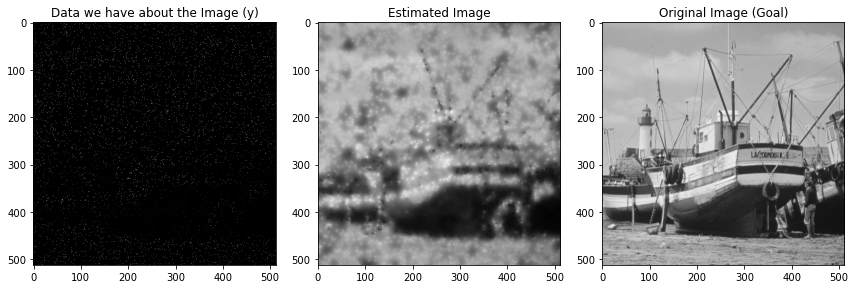

In [200]:
# Load the image
imgpil = Image.open("img/boat.png")  
x_bar = np.array(imgpil)
imgpil.close()

print(x_bar.shape)
print("Image size: %s x %s." % (x_bar.shape[0],x_bar.shape[1]))
print("Pixel values are in the interval [%s,%s]." % (x_bar.min(), x_bar.max()))

x_bar = x_bar.astype(np.float) # ensure pixel values are floating point numbers

N1,N2 = x_bar.shape
sample = np.random.rand(N1,N2)
mask = np.where(sample<=0.02,1,0)

y = np.multiply(x_bar,mask)

tau = 1.9 / 8
nbiter = 300

xrestored = projected_gradient_descent(grad_f, projection_inpainting, y, mask, y, nbiter, tau)

# display reconstructed (inpainted) image
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(y,cmap='gray')
plt.title('Data we have about the Image (y)')

plt.subplot(1,3,2)
plt.imshow(xrestored,cmap='gray')
plt.title('Estimated Image')

plt.subplot(1,3,3)
plt.imshow(x_bar,cmap='gray')
plt.title('Original Image (Goal)')

plt.tight_layout()

In [201]:
error = 100*np.linalg.norm(x_bar-xrestored)/np.linalg.norm(x_bar)
print('The relative difference between the goal and the estimation is around : ' + str(np.around(error,2)) + '%')

The relative difference between the goal and the estimation is around : 18.92%
